## Fourier Series

A Fourier series is a way of representing a periodic function as a (possibly infinite) sum of sine and cosine functions. The Fourier series of a periodic function $f(x)$ of period $T$ is

$$f(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty}a_k \cos \frac{2\pi kx}{T} + \sum_{k=1}^{\infty}b_k \sin \frac{2\pi kx}{T}$$

The Fourier coefficients $a_k$ and $b_k$ are defined by:
$$a_0 = \frac{2}{T} \int_0^T f(x)dx$$
$$a_k = \frac{2}{T} \int_0^T f(x) \cos \frac{2\pi kx}{T} dx$$
$$b_k = \frac{2}{T} \int_0^T f(x) \sin \frac{2\pi kx}{T} dx$$

Fourier coefficients for a mixture of sinusoidal signal would be non-zero only for specific values of frequency $k$. An example:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

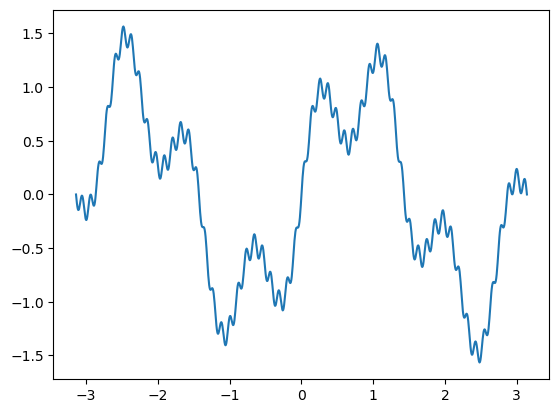

In [2]:
# Let's generate a mixed signal in the interval [-pi, pi], i.e. T = 2*pi
T = 2*np.pi
Nsample = 1000
x = np.linspace(-np.pi, np.pi, Nsample)
y = np.sin(2*x) + 0.5*np.sin(7*x) + 0.1*np.sin(55*x)

#y = np.sin(2*x) + 0.5*np.sin(7*x) + 0.1*np.sin(55*x)
plt.plot(x, y)

In [3]:
# Let's use a different plotting library for interactive plotting! :)
import plotly.express as px
px.line(x=x,y=y)

In [4]:
dt = (T/Nsample)
print(f"dt: {dt}, max. freq.: {1/(2*dt)}")
maxk = 80

dt: 0.006283185307179587, max. freq.: 79.57747154594766


In [5]:
from scipy import integrate
from scipy.integrate import*

a0 = integrate.simpson(y, x)/np.pi
ak = [integrate.simpson(y*np.cos(k*x), x)/np.pi for k in range(1,maxk)]
bk = [integrate.simpson(y*np.sin(k*x), x)/np.pi for k in range(1,maxk)]
k = np.array(range(1,maxk))


Note: Fourier coefficients are ~1 for k = 2, 7, 55 consistent with the freqnecies present in the mixed signal. The other values should be ignored.

In [6]:
px.bar(x=k[:maxk],y=bk[:maxk])

## Fourier Transform

An extension of Fourier series for non-periodic functions and continuous frequency values ...

Fourier transfrom:

$$\hat{F}(\omega) = \int_{-\infty}^{\infty} f(t) \exp (-2\pi i\omega t) dt $$

Inverse transform:

$$f(t) = \int_{-\infty}^{\infty} \hat{F}(\omega) \exp (2\pi i\omega t) d\omega $$

Fourier Transform can decompose a signal (e.g. a song/sound!) into its constituent frequencies. It also gives the magnitude of each frequency present in the signal.


## Discrete Fourier Transform (DFT)

In [7]:
def DFT(x):
    """
    Compute the discrete Fourier Transform of the 1D array x
    :param x: (array)
    """

    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

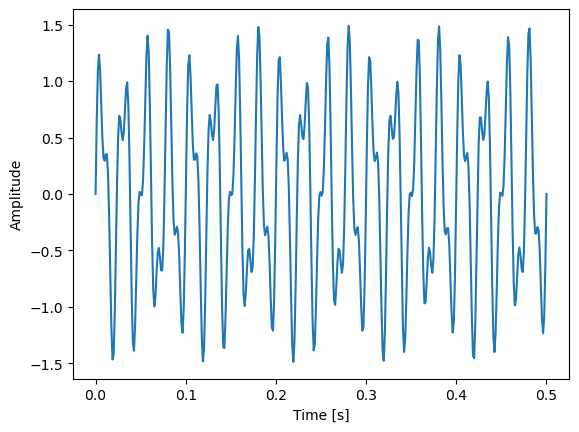

In [8]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 0.5, 400)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

In [9]:
dft = DFT(s)
T = t[1] - t[0]  # sampling interval 
N = s.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

#fig = px.bar(x=f[:N], y=np.abs(dft)[:N] * 1 / N)  # 1 / N is a normalization factor
fig = px.bar(x=f[:N // 2], y=np.abs(dft)[:N // 2] * 1 / N)  # 1 / N is a normalization factor
fig.update_layout(title='Discrete Fourier Transform in frequency domain', title_x=0.5,
                   xaxis_title='Frequency [Hz]',
                   yaxis_title='Amplitude')
fig.show()

## Fast Fourier Transform (FFT)

A significantly faster version of DFT ... we'll just use the library function from SciPy for this ...

In [10]:
fft = np.fft.fft(s)

for i in range(2):
    print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))

Value at index 0:	(0.0004728586555738379-0.0602049959834489j) 
Value at index 399:	(0.0004728586555728109+0.0602049959834485j)
Value at index 1:	(0.0019036702214342838-0.12118144254674379j) 
Value at index 398:	(0.0019036702214344225+0.12118144254674335j)


In [11]:
fft = np.fft.fft(s)
T = t[1] - t[0]  # sampling interval 
N = s.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

fig = px.bar(x=f[:N // 2], y=np.abs(fft)[:N // 2] * 1 / N)  # 1 / N is a normalization factor
fig.update_layout(title='Fast Fourier Transform in frequency domain', title_x=0.5,
                   xaxis_title='Frequency [Hz]',
                   yaxis_title='Amplitude')
fig.show()

## Processing audio files with FFT!

In [12]:
import scipy.io.wavfile

In [13]:
samplerate, data = scipy.io.wavfile.read('noisymusic.wav')

In [14]:
data.shape, samplerate

((661500,), 44100)

In [15]:
print(data)

[  249   990  -767 ...  -737 -1462  -113]


In [16]:
from IPython.display import Audio
Audio('noisymusic.wav')

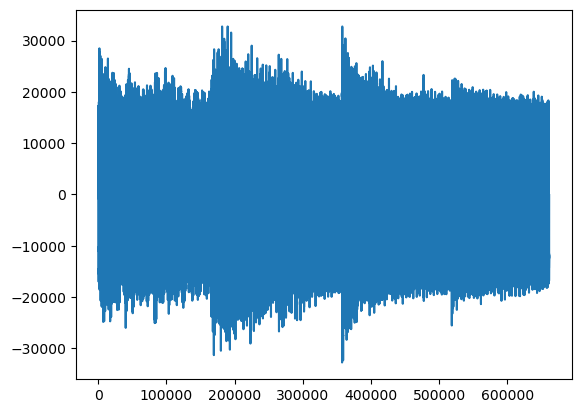

In [17]:
plt.plot(data)

In [18]:
from scipy.fftpack import fft     #use fft new module
fft = fft(data)

In [19]:
T = 1.0/samplerate  # sampling interval 
N = data.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

fig = px.line(x=f[:10000], y=np.abs(fft)[:10000]/N)  # 1 / N is a normalization factor
fig.update_layout(title='Sound Spectrum!', title_x=0.5,
                   xaxis_title='Frequency [Hz]',
                   yaxis_title='Amplitude')
fig.show()

In [20]:
fftnew = fft.copy()
# Removing all frequencies > 3000 Hz!
fftnew[f > 3000] = 0

In [21]:
fig = px.line(x=f[:10000], y=np.abs(fftnew)[:10000]/N)  # 1 / N is a normalization factor
fig.update_layout(title='Sound Spectrum!', title_x=0.5,
                   xaxis_title='Frequency [Hz]',
                   yaxis_title='Amplitude')
fig.show()

In [22]:
from scipy.fftpack import ifft
datanew = ifft(fftnew)
audionew = np.abs(datanew)

In [23]:
data.shape

(661500,)

In [24]:
datanew.shape

(661500,)

In [25]:
Audio(data, rate=samplerate)

In [26]:
Audio(audionew, rate=samplerate)

## Image denoising by FFT

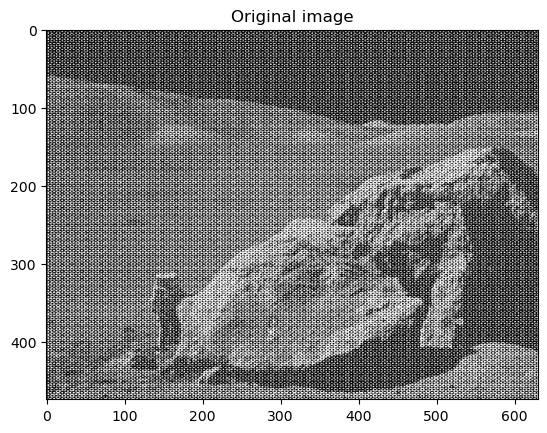

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# read the image file in a numpy array
im = plt.imread('moonlanding.png').astype(float)
plt.imshow(im, plt.cm.gray)
plt.title('Original image')
plt.show()

In [37]:
im.shape

(474, 630)

In [43]:
im[:,:]

array([[0.04705882, 0.        , 0.23921569, ..., 0.        , 0.00392157,
        0.53333336],
       [0.        , 0.        , 0.67843139, ..., 0.10196079, 0.29019609,
        0.        ],
       [0.72156864, 0.10980392, 0.60392159, ..., 0.        , 0.21568628,
        1.        ],
       ...,
       [0.00392157, 0.        , 1.        , ..., 1.        , 1.        ,
        0.95686275],
       [0.        , 0.        , 0.15686275, ..., 0.        , 0.        ,
        0.35294119],
       [1.        , 0.52156866, 0.04705882, ..., 0.        , 0.        ,
        1.        ]])

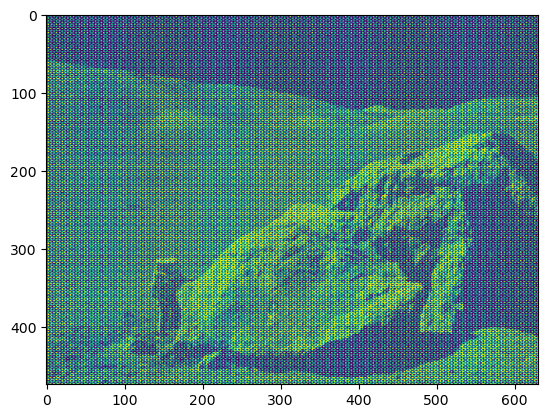

In [40]:
# plt.imshow(im[:,:], cmap='gray')
plt.imshow(im[:,:])

plt.show()

Compute the 2d FFT of the input image:

Text(0.5, 1.0, 'Fourier transform')

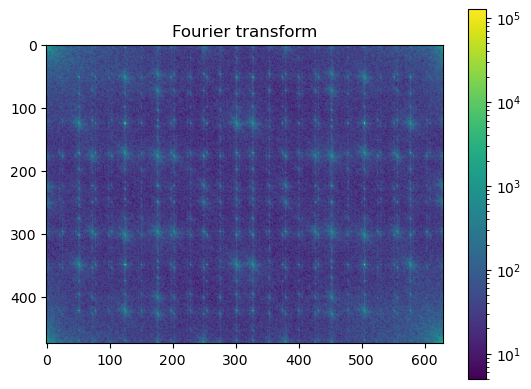

In [28]:
from scipy import fftpack
im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Let's keep only a small subset of the frequencies ... the goal is to remove noisy data ...

Text(0.5, 1.0, 'Filtered Spectrum')

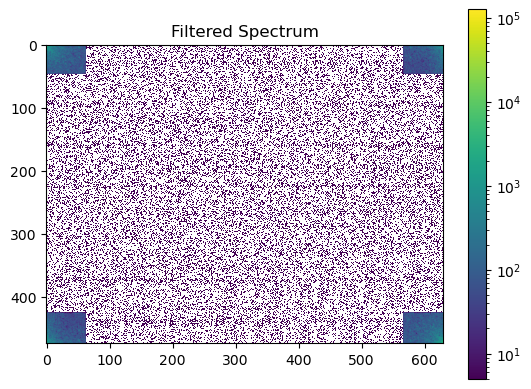

In [29]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

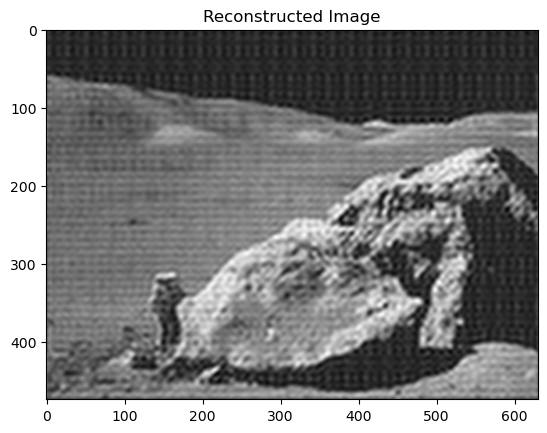

In [30]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

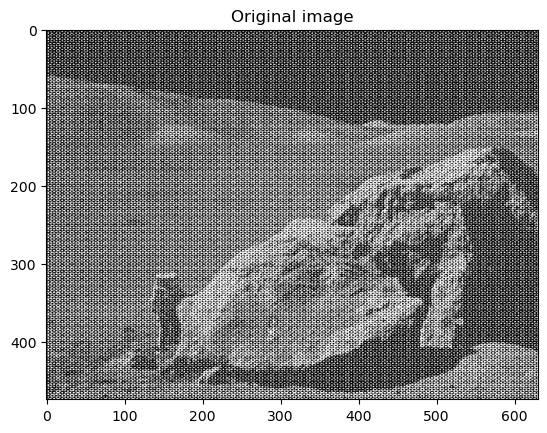

In [31]:
# Compare with the original! :)
plt.imshow(im, plt.cm.gray)
plt.title('Original image')
plt.show()

## References:

Some of the materials used here have been "borrowed" from other tutorials/resources. A few of them are:

1. https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520
2. https://timsainburg.com/noise-reduction-python.html
3. https://github.com/davidpraise45/Audio-Signal-Processing
4. http://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html


